# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.


In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


buscar = "camiseta seleccion argentina original" # la busqueda que estamos analizando
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

response = requests.request("GET", url)


dato = response.json() # guardar la busqueda en un diccionario
#type(data) # dict
#print(data)

# Vemos la longitud de la lista de resultados
print('Longitud de la lista de resultados:', len(dato['results'])) # para que veamos la longitud de la lista

# Vemos el precio del primer resultado de la búsqueda
print('Precio del primer resultado:', dato['results'][0]['price'])

precios = []
for resultado in dato['results']:
    if 'price' in resultado:
        precios.append(resultado['price']) # crear una lista de precios



Longitud de la lista de resultados: 50
Precio del primer resultado: 149888


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo.

In [39]:


df = pd.DataFrame({'Precio': precios}) # declarar un df con la lista de precios
print(df)

medio_precio =  df['Precio'].mean() # imprimir medio, minimo y maximo
min_precio =  df['Precio'].min()
max_precio =  df['Precio'].max()

print("\nMin: ", min_precio)
print("Medio:", medio_precio)
print("Max:", max_precio)

        Precio
0    149888.00
1    109999.00
2     96888.00
3     99999.00
4    140000.00
5     92888.00
6      8000.00
7     20000.00
8     44990.00
9     12000.00
10    25000.00
11    15000.00
12    35000.00
13    89999.00
14    43500.00
15    29999.00
16    15000.00
17     9999.99
18    27500.00
19    30000.00
20    40000.00
21    55000.00
22    13999.00
23  1500000.00
24    40000.00
25    84000.00
26   279000.00
27   100000.00
28    47900.00
29   390000.00
30    45000.00
31   150000.00
32    33000.00
33    19000.00
34   100000.00
35    30000.00
36   100000.00
37    62000.00
38   700000.00
39    59000.00
40   160000.00
41    45000.00
42    50000.00
43    29000.00
44    12000.00
45    12000.00
46     8000.00
47    30000.00
48    17000.00
49     5000.00
Min:  5000.0
Medio: 106230.9798
Max: 1500000.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

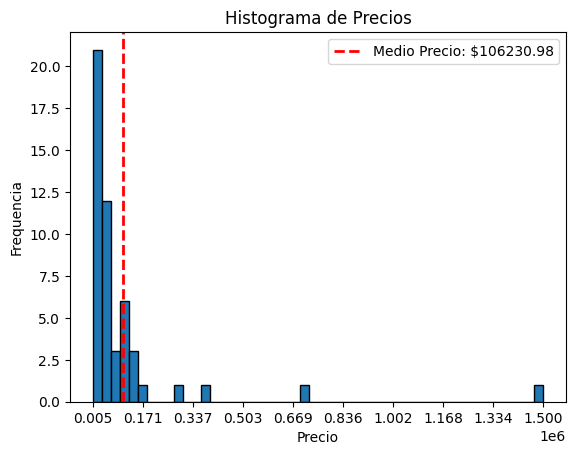

In [40]:
plt.hist(precios, bins=50, edgecolor='k') # crear histogram, con bins igual del numero de valores en la lista de precios
plt.xlabel('Precio')
plt.ylabel('Frequencia')
plt.title('Histograma de Precios')
plt.axvline(medio_precio, color='red', linestyle='dashed', linewidth=2, label=f'Medio Precio: ${medio_precio:.2f}')
# para que aparezca una linear del precio medio
plt.legend() # una leyenda

#plt.xticks(prices[::10], rotation=45) # estaba intentando a configurar los xticks para ver precios actuales
prices_spaced = np.linspace(min_precio, max_precio, 10) # para crear una lista de 10 valores, que están espaciados por igual entre el minimo y maximo valor

plt.xticks(prices_spaced) # uso la lista que acabo de crear como xticks


plt.show()

# segun de la histograma, es obvio que hay outliers, porque hay algunos precio que aparecen lejanos de el medio precio. Además, los precios se muestran en valores decimales